<a href="https://colab.research.google.com/github/Endework/Zindi_projects/blob/smartmoney/SmartMoney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alvin Smart Money Management Classification Challenge

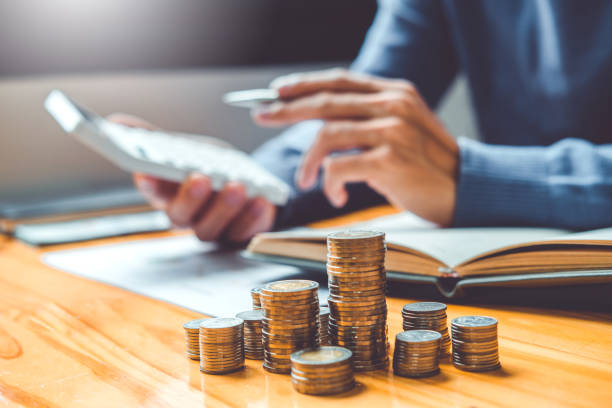

Alvin is a smart money manager app that uses automated budgeting, personalised offers, and applied behavioural game design strategies to help people align their daily spending around their savings goals in a sustainable way.

The objective of this challenge is to create a machine learning algorithm that classifies purchases into 13 different categories. Alvin registers most transactions from MPESA notifications, but some users classify their purchases manually.

This solution will help Alvin automatically classify expenditure into different categories, improving Alvin’s services and offerings to their users.

Alvin is a Kenyan personal finance company building money management widgets optimised for African contexts. They'd like to use the categorisation assessments that Alvin users have categorised manually so far to produce a machine learning model that recommends categories for future merchants Alvin users transact with.

#Data preprocessing

* Load the datasets using pandas.
* Handle missing values.
* Convert categorical variables into numerical variables using techniques like one-hot encoding or label encoding.










In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report



In [ ]:
# Load data
train=pd.read_csv('/content/Train.csv')
test=pd.read_csv('/content/Test.csv')
extra=pd.read_csv('/content/SampleSubmission (1).csv')

In [ ]:
# handle missing values
train.isnull().sum()


MERCHANT_CATEGORIZED_AT                    0
MERCHANT_NAME                              0
MERCHANT_CATEGORIZED_AS                    0
PURCHASE_VALUE                             0
PURCHASED_AT                               0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY      0
USER_AGE                                 312
USER_GENDER                                6
USER_HOUSEHOLD                             0
USER_INCOME                                0
USER_ID                                    0
Transaction_ID                             0
dtype: int64

In [ ]:
test.isnull().sum()

MERCHANT_CATEGORIZED_AT                    0
MERCHANT_NAME                              0
PURCHASE_VALUE                             0
PURCHASED_AT                               0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY      0
USER_AGE                                 473
USER_GENDER                                5
USER_HOUSEHOLD                             0
USER_INCOME                                0
USER_ID                                    0
Transaction_ID                             0
dtype: int64

In [ ]:
train['USER_GENDER'].fillna('Female', inplace=True)
test['USER_GENDER'].fillna('Female', inplace=True)


In [ ]:
# Impute the missing age entries with the median of that column
train_median_value = np.median(train['USER_AGE'].dropna())
train['USER_AGE'] = train['USER_AGE'].fillna(train_median_value)

test_median_value = np.median(test['USER_AGE'].dropna())
test['USER_AGE'] = test['USER_AGE'].fillna(test_median_value)

In [ ]:
train.isnull().sum()

MERCHANT_CATEGORIZED_AT                  0
MERCHANT_NAME                            0
MERCHANT_CATEGORIZED_AS                  0
PURCHASE_VALUE                           0
PURCHASED_AT                             0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY    0
USER_AGE                                 0
USER_GENDER                              0
USER_HOUSEHOLD                           0
USER_INCOME                              0
USER_ID                                  0
Transaction_ID                           0
dtype: int64

In [ ]:
test.isnull().sum()

MERCHANT_CATEGORIZED_AT                  0
MERCHANT_NAME                            0
PURCHASE_VALUE                           0
PURCHASED_AT                             0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY    0
USER_AGE                                 0
USER_GENDER                              0
USER_HOUSEHOLD                           0
USER_INCOME                              0
USER_ID                                  0
Transaction_ID                           0
dtype: int64

In [ ]:
# Cell 5: Create a label encoder object
le = LabelEncoder()



In [ ]:
# Cell 6: Convert 'USER_GENDER' to numerical values
train['USER_GENDER'] = le.fit_transform(train['USER_GENDER'])
test['USER_GENDER'] = le.transform(test['USER_GENDER'])

In [ ]:
# Cell 7: Convert 'IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY' to numerical values
train['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'] = train['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'].map({'Y': True, 'N': False})
test['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'] = test['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'].map({'Y': True, 'N': False})



In [ ]:
# Cell 8: Now, we can apply label encoding
train['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'] = le.fit_transform(train['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'])
test['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'] = le.transform(test['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'])





In [ ]:
train.head()

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
0,2022-05-04 10:25:50.588042+00,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00,0,25.0,1,3,10000,ID_ZX4DCF4K,ID_04mk78fa
1,2021-10-25 16:18:38.586837+00,PARK N GO,Transport & Fuel,100,2021-10-24 14:12:00+00,0,25.0,0,4,90000,ID_U9WZMGJZ,ID_04xkfb07
2,2022-05-20 14:17:30.917297+00,SAFARICOM OFFERS TUNUKIWA,Data & WiFi,20,2022-05-27 12:46:00+00,0,25.0,1,3,10000,ID_ZX4DCF4K,ID_051urwuw
3,2022-04-12 15:59:14.139347+00,ZILLIONS CREDIT LIMITED,Loan Repayment,3800,2022-02-07 12:16:00+00,0,25.0,1,5,252000,ID_3JA0MAFB,ID_0e1om7rz
4,2022-05-04 10:24:26.709045+00,MICHAEL MUSEMBI,Bills & Fees,60,2022-05-04 15:28:00+00,0,25.0,1,3,10000,ID_ZX4DCF4K,ID_0kfcoawb


#Exploratory Data Analysis (EDA)

* Understand the distribution of different classes in the target variable.
* Analyze the relationship between different features and the target variable.

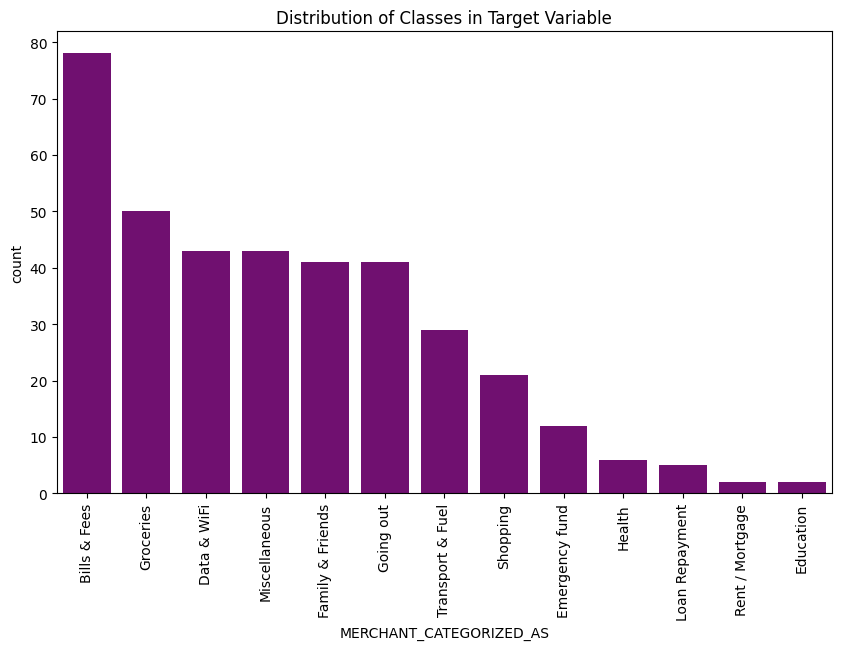

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(data=train, x='MERCHANT_CATEGORIZED_AS', color='purple', order = train['MERCHANT_CATEGORIZED_AS'].value_counts().index)
plt.title('Distribution of Classes in Target Variable')
plt.xticks(rotation=90)
plt.show()


The target variable in the distribution analysis image shows an imbalance among the classes. For example:

- **Bills & Fees**: This is the most frequent transaction type, as it has the highest count.
- **Education**: This is the rarest transaction type, as it has the lowest count.
- **Other Categories**: Some categories, such as Groceries and Data & WiFi, have similar counts, indicating moderate frequency.

To address this imbalance, we can apply Synthetic Minority Over-sampling Technique (SMOTE) to create synthetic data for the classes that are underrepresented.

This can help enhance the performance of our model, especially for the classes with fewer instances, as it creates a more balanced training signal across all classes.

<ipython-input-16-78369fb4a068>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


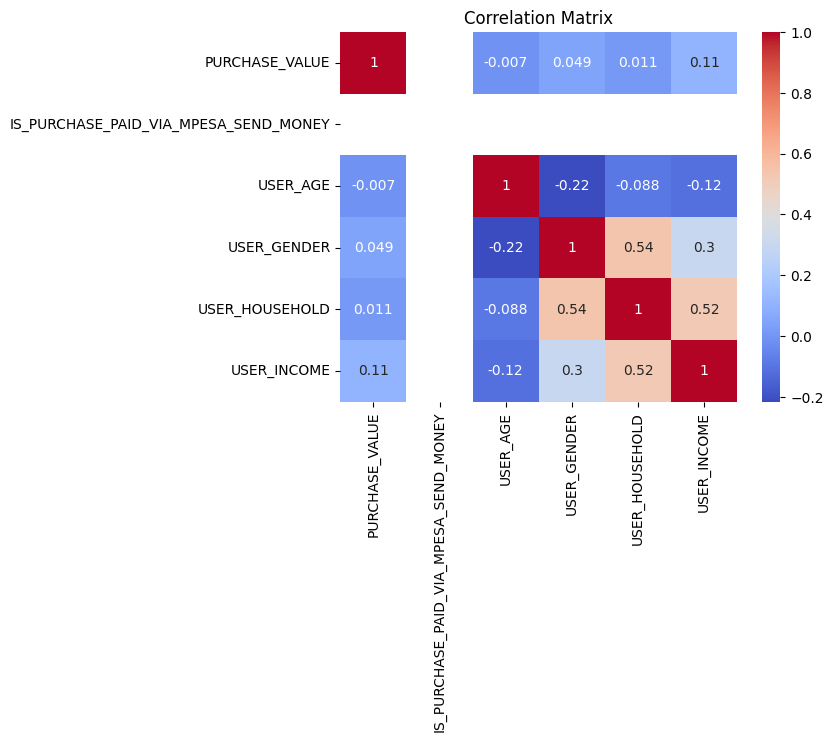

In [ ]:
# Analyze the relationship between different features and the target variable
# Correlation Matrix: A correlation matrix is used to investigate the dependence between multiple variables at the same time
corr_matrix = train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


The dataset has different features that can be analyzed using the correlation matrix. Here are some insights from the matrix:

- The purchase value and the user income have a positive correlation of 0.11. This means that they have a slight positive relationship, but it is not very strong. The higher the user income, the higher the purchase value, but not by much.

- The user age and the user gender have a negative correlation of -0.22. This means that they have a weak negative relationship, but it might not be significant. The user gender is a categorical variable, so the correlation might not make sense.

- The user gender and the user household have a positive correlation of 0.54. This means that they have a moderate positive relationship, and it might be important. The user gender might be related to the size of the household, either larger or smaller.

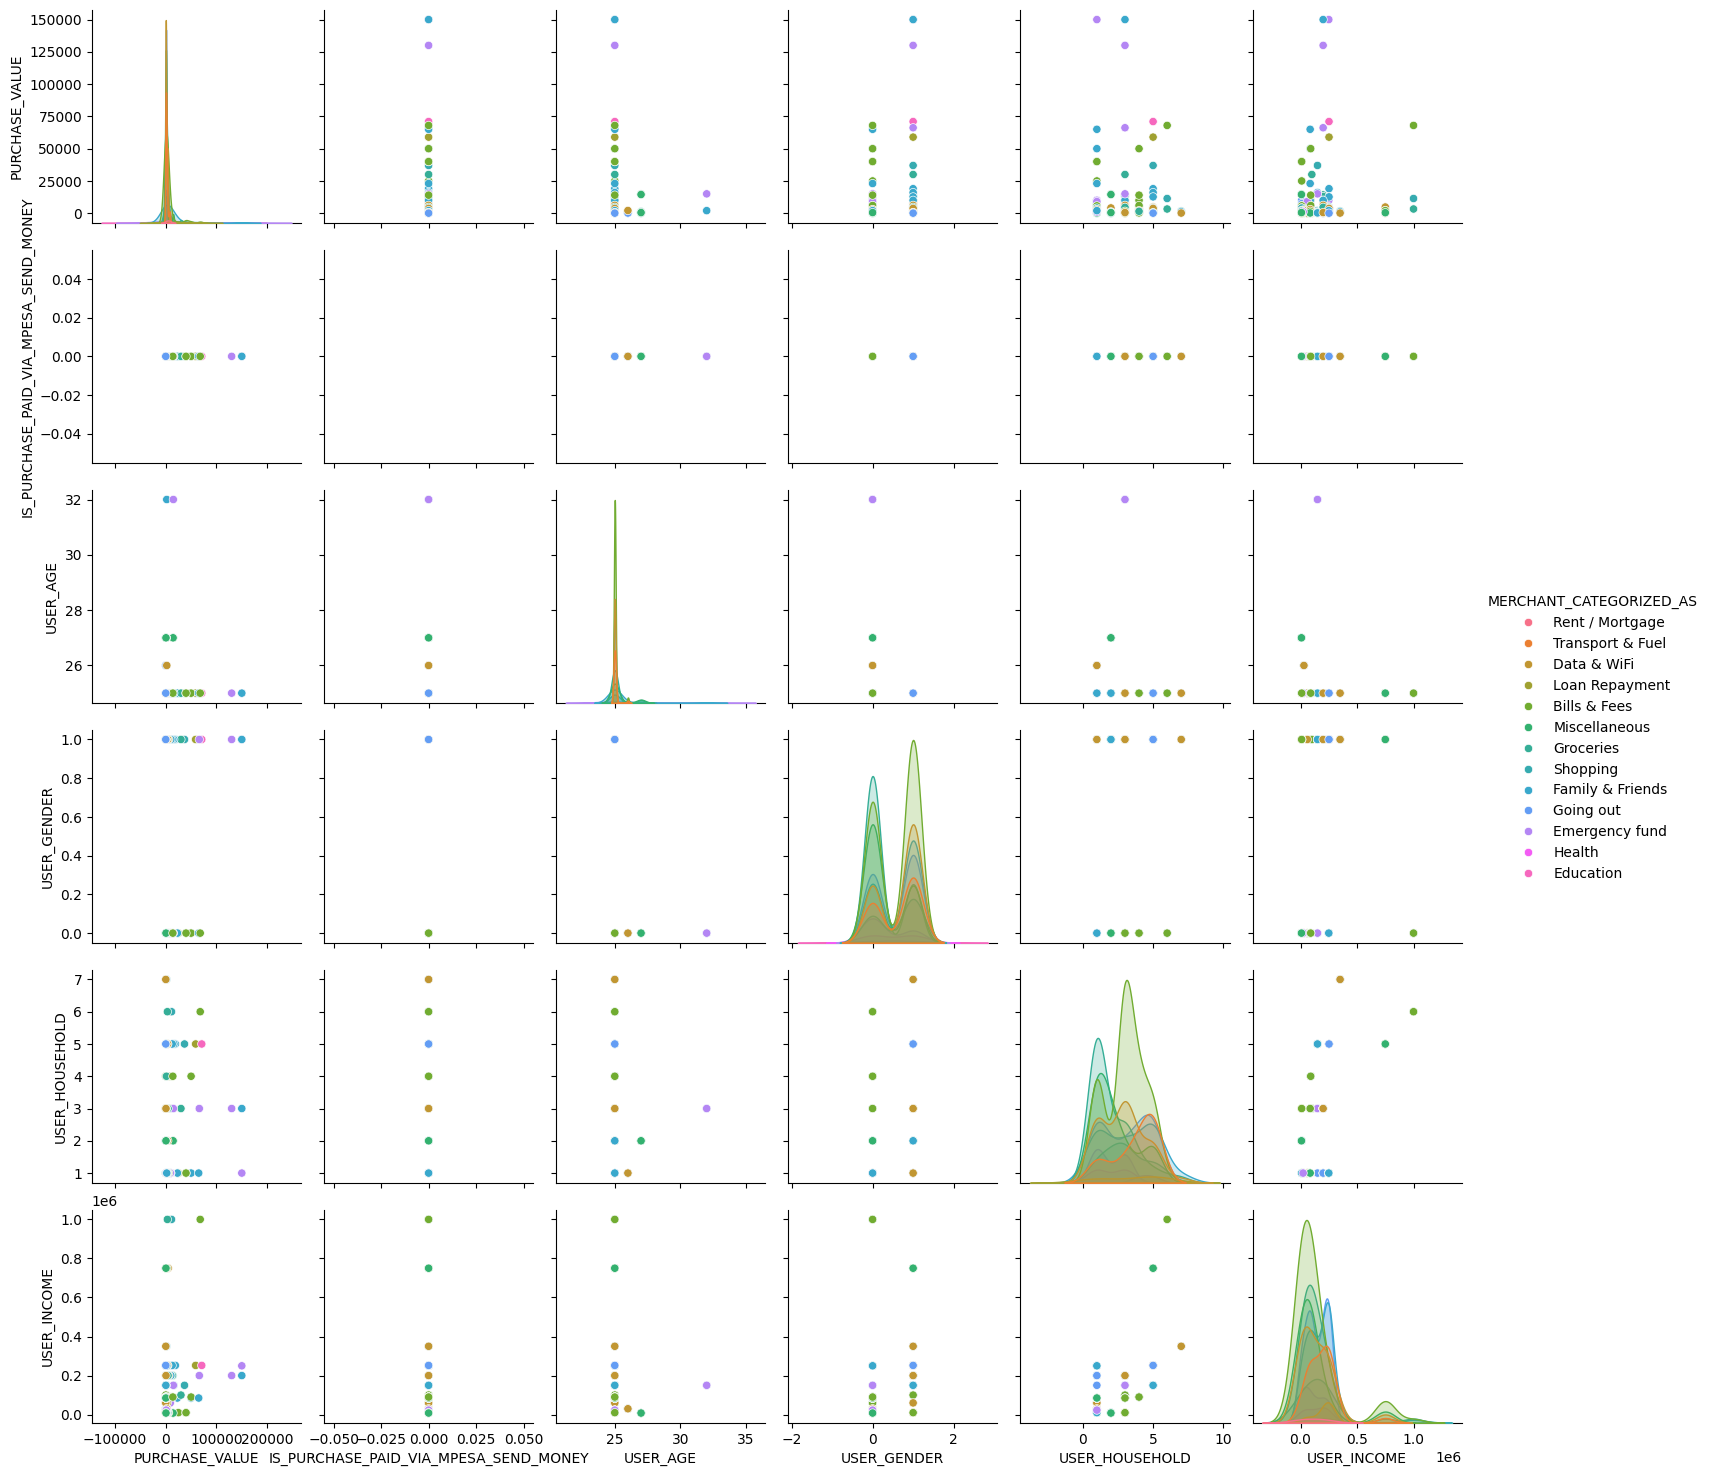

In [ ]:
# Pairplot: A pairplot allows us to see both distribution of single variables and relationships between two variables.
sns.pairplot(train, hue='MERCHANT_CATEGORIZED_AS')
plt.show()


The correlation matrix and the pair plot are useful tools for exploring the data. Here is a summary of what they reveal:

- The correlation matrix shows that there is a weak positive correlation between PURCHASE_VALUE and USER_INCOME (0.11), meaning that users with higher income tend to buy more expensive items, but not by much. There is also a weak negative correlation between USER_AGE and USER_GENDER (-0.22), which suggests that older users are more likely to be female, but this might not be a valid interpretation since gender is not a numerical variable. Finally, there is a moderate positive correlation between USER_GENDER and USER_HOUSEHOLD (0.54), which implies that one gender is more likely to have larger or smaller households.

- The pair plot shows the distribution of each variable in histograms along the diagonal, and the relationship between two variables in scatter plots off the diagonal. The histograms show that USER_AGE is skewed to the right, meaning that most users are young. The scatter plots show that there is a clear upward trend in PURCHASE_VALUE vs USER_INCOME, indicating a positive correlation, and that there is some clustering of data points by merchant category, meaning that some categories have similar features. The scatter plots also show that there is no clear pattern in the other variable pairs, suggesting no strong linear relationship.

- The colors in the pair plot represent the merchant category of each transaction. They help to visualize how different categories are distributed across the variables. For example, we can see that category 1 has mostly low purchase values and low user incomes, while category 4 has mostly high purchase values and high user incomes.

- The outliers in the pair plot are data points that deviate from the general trend or cluster. They could be errors or anomalies that need further investigation. For example, we can see that there are some transactions with very high purchase values but very low user incomes, which could be suspicious or fraudulent.

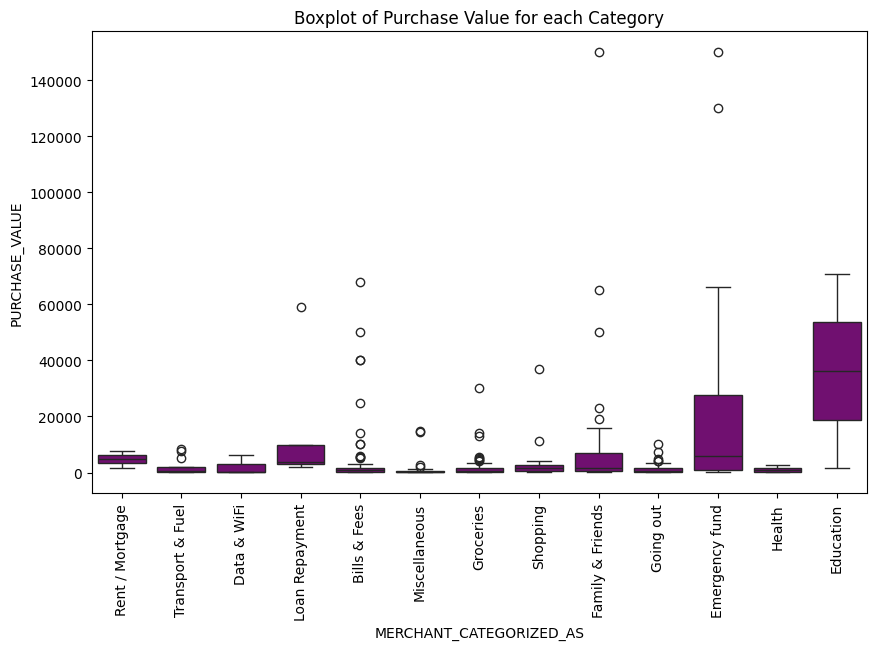

In [ ]:
# Boxplots: Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.
plt.figure(figsize=(10,6))
sns.boxplot(x='MERCHANT_CATEGORIZED_AS', y='PURCHASE_VALUE', data=train, color='purple')
plt.title('Boxplot of Purchase Value for each Category')
plt.xticks(rotation=90)
plt.show()


# Feature Engineering

* Create new features that might help improve the model's performance.
* Normalize or standardize features if necessary.

In [ ]:
train["train"] = 1
test["train"] = 0

In [ ]:
all_data = pd.concat([train, test])

In [ ]:
all_data = pd.get_dummies(all_data, prefix_sep="_", columns=['MERCHANT_NAME'])

In [ ]:
all_data.head()

,MERCHANT_CATEGORIZED_AT,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,...,MERCHANT_NAME_XGO KENYA LIMITED,MERCHANT_NAME_ZALENA KITCHEN,MERCHANT_NAME_ZASH LOAN,MERCHANT_NAME_ZAVON HEZRON,MERCHANT_NAME_ZILLIONS CREDIT LIMITED,MERCHANT_NAME_ZIMELE UNIT TRUST,MERCHANT_NAME_ZUKU,MERCHANT_NAME_ZUKU FOR,MERCHANT_NAME_ZURI MEDICAL FUND EVAN,MERCHANT_NAME_ZURI MEDICAL FUND EVAN OMONDI
0,2022-05-04 10:25:50.588042+00,Rent / Mortgage,1700,2022-05-04 13:56:00+00,0,25.0,1,3,10000,ID_ZX4DCF4K,...,0,0,0,0,0,0,0,0,0,0
1,2021-10-25 16:18:38.586837+00,Transport & Fuel,100,2021-10-24 14:12:00+00,0,25.0,0,4,90000,ID_U9WZMGJZ,...,0,0,0,0,0,0,0,0,0,0
2,2022-05-20 14:17:30.917297+00,Data & WiFi,20,2022-05-27 12:46:00+00,0,25.0,1,3,10000,ID_ZX4DCF4K,...,0,0,0,0,0,0,0,0,0,0
3,2022-04-12 15:59:14.139347+00,Loan Repayment,3800,2022-02-07 12:16:00+00,0,25.0,1,5,252000,ID_3JA0MAFB,...,0,0,0,0,1,0,0,0,0,0
4,2022-05-04 10:24:26.709045+00,Bills & Fees,60,2022-05-04 15:28:00+00,0,25.0,1,3,10000,ID_ZX4DCF4K,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Split all_data back into train and test data
train = all_data[all_data["train"] == 1].drop(['MERCHANT_CATEGORIZED_AT','PURCHASED_AT','USER_ID', 'Transaction_ID', "train"], axis=1)
test = all_data[all_data["train"] == 0].drop(['MERCHANT_CATEGORIZED_AT','PURCHASED_AT','USER_ID', "train", "MERCHANT_CATEGORIZED_AS"], axis=1)



In [ ]:
# Cell 12: Convert 'MERCHANT_CATEGORIZED_AS' to numerical values
y_train = le.fit_transform(train['MERCHANT_CATEGORIZED_AS'].astype(str))



In [ ]:
# Cell 13: Separate features and target variable in your training data
X_train = train.drop('MERCHANT_CATEGORIZED_AS', axis=1)



In [ ]:
# Cell 14: Apply SMOTE
smote = SMOTE(random_state=0, k_neighbors=1)  # Use only 1 neighbor
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)



In [ ]:
# Cell 15: Split the training data into training and validation sets
X_train_res, X_val_res, y_train_res, y_val_res = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)



# Model Building

* Split the training data into training and validation sets.
* Choose a suitable machine learning algorithm for classification. You could start with simple models like Logistic Regression, and then try more complex models like Random Forests, XGBoost, or Neural Networks.
Train the model on the training set and validate it on the validation set.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)

# Cell 18: Fit the model on the training data
dt.fit(X_train_res, y_train_res)

# Cell 19: Predict the target variable for the validation set
y_val_pred = dt.predict(X_val_res)

In [ ]:
print(classification_report(y_val_res, y_val_pred))

              precision    recall  f1-score   support

           0       0.79      0.69      0.73        16
           1       0.93      0.81      0.87        16
           2       1.00      0.92      0.96        13
           3       0.79      1.00      0.88        11
           4       0.38      0.43      0.40         7
           5       0.81      0.65      0.72        20
           6       0.62      0.67      0.64        12
           7       0.90      1.00      0.95        19
           8       0.83      0.88      0.86        17
           9       0.71      0.71      0.71        21
          10       1.00      1.00      1.00        16
          11       0.94      0.81      0.87        21
          12       0.67      0.86      0.75        14

    accuracy                           0.81       203
   macro avg       0.80      0.80      0.80       203
weighted avg       0.82      0.81      0.81       203



In [ ]:
# Cell 16: Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Cell 17: Initialize the LogisticRegression
lr = LogisticRegression(random_state=0)

# Cell 18: Fit the model on the training data
lr.fit(X_train_res, y_train_res)

# Cell 19: Predict the target variable for the validation set
y_val_pred = lr.predict(X_val_res)
print(classification_report(y_val_res, y_val_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        16
           2       0.50      0.85      0.63        13
           3       0.38      0.27      0.32        11
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        20
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00        19
           8       0.17      0.76      0.27        17
           9       0.00      0.00      0.00        21
          10       0.00      0.00      0.00        16
          11       0.00      0.00      0.00        21
          12       0.11      0.57      0.18        14

    accuracy                           0.17       203
   macro avg       0.09      0.19      0.11       203
weighted avg       0.07      0.17      0.09       203



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Cell 17: Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

# Cell 18: Fit the model on the training data
rf.fit(X_train_res, y_train_res)

# Cell 19: Predict the target variable for the validation set
y_val_pred = rf.predict(X_val_res)

# Cell 20: Print the classification report
print(classification_report(y_val_res, y_val_pred))
# Import joblib
# Import joblib
import joblib

# Save the model
joblib.dump(rf, 'random_forest_model.pkl')



              precision    recall  f1-score   support

           0       1.00      0.50      0.67        16
           1       0.88      0.88      0.88        16
           2       0.92      0.92      0.92        13
           3       0.79      1.00      0.88        11
           4       0.50      0.71      0.59         7
           5       0.81      0.65      0.72        20
           6       0.82      0.75      0.78        12
           7       1.00      0.95      0.97        19
           8       0.94      0.88      0.91        17
           9       0.84      0.76      0.80        21
          10       1.00      1.00      1.00        16
          11       0.79      0.90      0.84        21
          12       0.55      0.86      0.67        14

    accuracy                           0.83       203
   macro avg       0.83      0.83      0.82       203
weighted avg       0.85      0.83      0.83       203



['random_forest_model.pkl']

In [ ]:
import sklearn
print(sklearn.__version__)


1.2.2


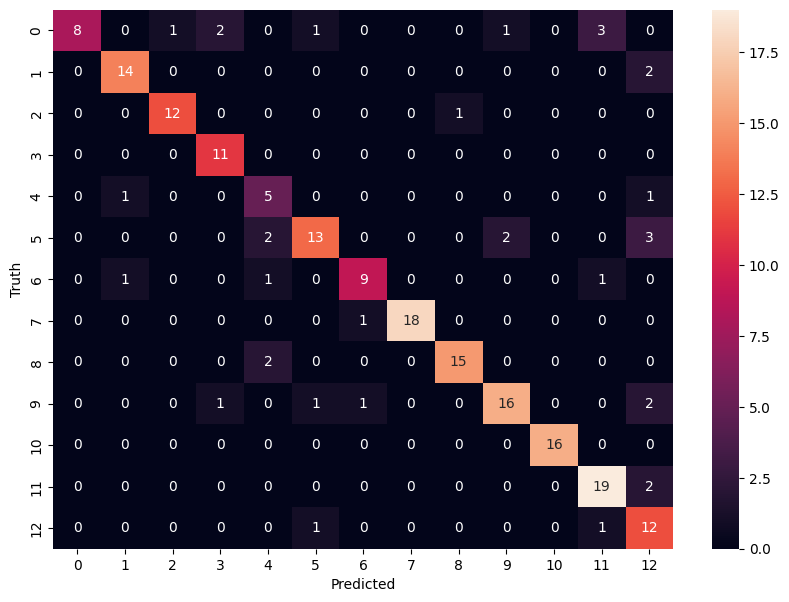

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_val_res, y_val_pred)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [ ]:
# Cell 17: Initialize the KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# Cell 18: Fit the model on the training data
knn.fit(X_train_res, y_train_res)

# Cell 19: Predict the target variable for the validation set
y_val_pred = knn.predict(X_val_res)

# Cell 20: Print the classification report
print(classification_report(y_val_res, y_val_pred))

              precision    recall  f1-score   support

           0       0.40      0.38      0.39        16
           1       0.62      0.62      0.62        16
           2       0.93      1.00      0.96        13
           3       0.64      0.82      0.72        11
           4       0.33      0.57      0.42         7
           5       0.62      0.25      0.36        20
           6       0.43      0.50      0.46        12
           7       0.82      0.74      0.78        19
           8       0.50      0.59      0.54        17
           9       0.72      0.62      0.67        21
          10       0.64      0.56      0.60        16
          11       0.65      0.62      0.63        21
          12       0.52      0.79      0.63        14

    accuracy                           0.61       203
   macro avg       0.60      0.62      0.60       203
weighted avg       0.62      0.61      0.60       203



In [ ]:
from xgboost import XGBClassifier

# Cell 17: Initialize the XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Cell 18: Fit the model on the training data
xgb.fit(X_train_res, y_train_res)

# Cell 19: Predict the target variable for the validation set
y_val_pred = xgb.predict(X_val_res)

# Cell 20: Print the classification report
print(classification_report(y_val_res, y_val_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        16
           1       0.86      0.75      0.80        16
           2       1.00      0.92      0.96        13
           3       0.85      1.00      0.92        11
           4       0.36      0.57      0.44         7
           5       0.75      0.45      0.56        20
           6       0.55      0.50      0.52        12
           7       0.90      0.95      0.92        19
           8       0.94      0.88      0.91        17
           9       0.59      0.76      0.67        21
          10       1.00      1.00      1.00        16
          11       0.76      0.76      0.76        21
          12       0.79      0.79      0.79        14

    accuracy                           0.78       203
   macro avg       0.78      0.78      0.77       203
weighted avg       0.79      0.78      0.78       203



# Model Tuning

* Tune the model's hyperparameters to improve its performance.
* Use techniques like Grid Search or Random Search for hyperparameter tuning.

In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [200, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV
grid_search.fit(X_train_res, y_train_res)

# Get the best parameters
best_params = grid_search.best_params_

# Print the best parameters
print(best_params)

# Fit the RandomForestClassifier with the best parameters on the training data
rf_best = RandomForestClassifier(**best_params, random_state=0)
rf_best.fit(X_train_res, y_train_res)

# Predict the target variable for the validation set
y_val_pred = rf_best.predict(X_val_res)

# Print the classification report
print(classification_report(y_val_res, y_val_pred))


Fitting 3 folds for each of 288 candidates, totalling 864 fits
{'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       1.00      0.62      0.77        16
           1       0.88      0.88      0.88        16
           2       1.00      0.92      0.96        13
           3       0.69      1.00      0.81        11
           4       0.44      0.57      0.50         7
           5       0.83      0.50      0.62        20
           6       0.75      0.75      0.75        12
           7       0.86      0.95      0.90        19
           8       0.94      0.88      0.91        17
           9       0.88      0.71      0.79        21
          10       1.00      1.00      1.00        16
          11       0.83      0.90      0.86        21
          12       0.52      0.86      0.65        14

    accuracy                           0.81       203
   macro avg       0

# Prediction

In [ ]:
# Load the model
rf_loaded = joblib.load('random_forest_model.pkl')

# Use the loaded model to make predictions
predictions = rf_loaded.predict(test.drop(["Transaction_ID", "predictions"], axis=1, errors='ignore'))
# Get the predicted result for the test Data
predictions = rf.predict(test.drop(["Transaction_ID", "predictions"], axis=1, errors='ignore'))

# Transform the predictions back to the original class names
predictions = le.inverse_transform(predictions)

# Add the predictions to the test DataFrame
test["predictions"] = predictions

# Display the Transaction_ID and corresponding predictions
print(test[["Transaction_ID", "predictions"]].head())



  Transaction_ID      predictions
0    ID_00x9h2yx         Shopping
1    ID_01db594f        Going out
2    ID_07pm99no    Miscellaneous
3    ID_09jryhkd    Miscellaneous
4    ID_0ccv924c  Rent / Mortgage


In [ ]:
# Get the predicted result for the test Data
predictions = rf.predict(test.drop(["Transaction_ID", "predictions"], axis=1, errors='ignore'))

# Transform the predictions back to the original class names
predictions = le.inverse_transform(predictions)

# Add the predictions to the test DataFrame
test["predictions"] = predictions

# Display the unique predicted classes
print(test["predictions"].unique())


['Shopping' 'Going out' 'Miscellaneous' 'Rent / Mortgage' 'Data & WiFi'
 'Emergency fund' 'Family & Friends' 'Transport & Fuel' 'Groceries'
 'Bills & Fees' 'Loan Repayment' 'Health' 'Education']


In [ ]:
# Create dummy variables for the 'predictions' column
sub = pd.get_dummies(test[["Transaction_ID",  "predictions"]], columns=['predictions'])

# Remove the prefix
sub.columns = sub.columns.str.replace('predictions_','')

# Save the DataFrame to a CSV file
sub.to_csv('predictions.csv', index=False)


In [ ]:
predict=pd.read_csv('/content/predictions.csv')
predict.head()

,Transaction_ID,Bills & Fees,Data & WiFi,Education,Emergency fund,Family & Friends,Going out,Groceries,Health,Loan Repayment,Miscellaneous,Rent / Mortgage,Shopping,Transport & Fuel
0,ID_00x9h2yx,0,0,0,0,0,0,0,0,0,0,0,1,0
1,ID_01db594f,0,0,0,0,0,1,0,0,0,0,0,0,0
2,ID_07pm99no,0,0,0,0,0,0,0,0,0,1,0,0,0
3,ID_09jryhkd,0,0,0,0,0,0,0,0,0,1,0,0,0
4,ID_0ccv924c,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.metrics import log_loss

# Get the predicted probabilities for the validation set
y_val_pred_proba = rf.predict_proba(X_val_res)

# Calculate the log loss
loss = log_loss(y_val_res, y_val_pred_proba)

print('Log Loss: ', loss)


Log Loss:  2.2225939862271837
